Imports and Loading Cleaned Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_vegetable_prices.csv')

# Display the first few rows
df.head()

,price_dates,bhindi_ladies_finger,tomato,onion,potato,brinjal,garlic,peas,methi,green_chilli,elephant_yam_suran
0,2023-01-01,35.0,18,22.0,20,30,50,25,8,45.0,25
1,2023-02-01,35.0,16,22.0,20,30,55,25,7,40.0,25
2,2023-03-01,35.0,16,21.0,20,30,55,25,7,40.0,25
3,2023-04-01,30.0,16,21.0,22,25,55,25,7,40.0,25
4,2023-08-01,35.0,16,20.0,21,25,55,22,6,35.0,25


Data Exploration

Summary Statistics:

In [3]:
df.describe()

,bhindi_ladies_finger,tomato,onion,potato,brinjal,garlic,peas,methi,green_chilli,elephant_yam_suran
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


Visualizing Price Trends

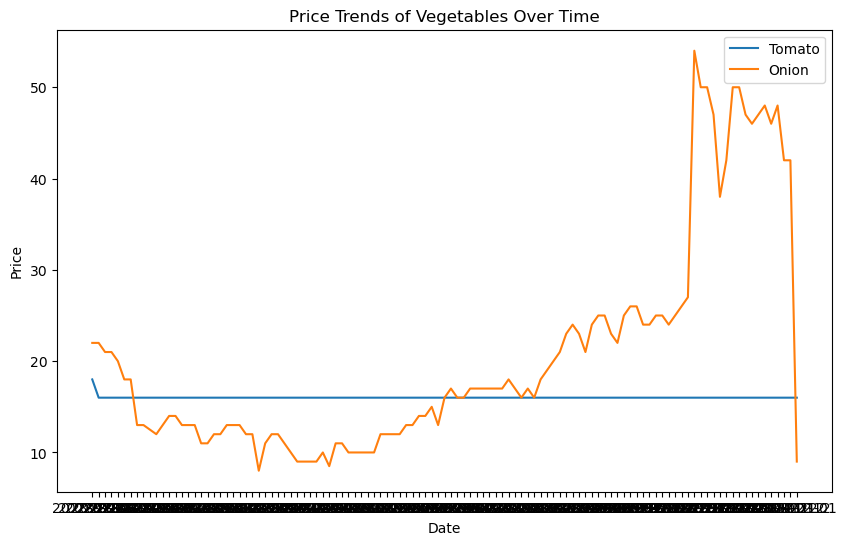

In [4]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='price_dates', y='tomato', data=df, label='Tomato')
sns.lineplot(x='price_dates', y='onion', data=df, label='Onion')
plt.title('Price Trends of Vegetables Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Price trends trends for each vegetable column

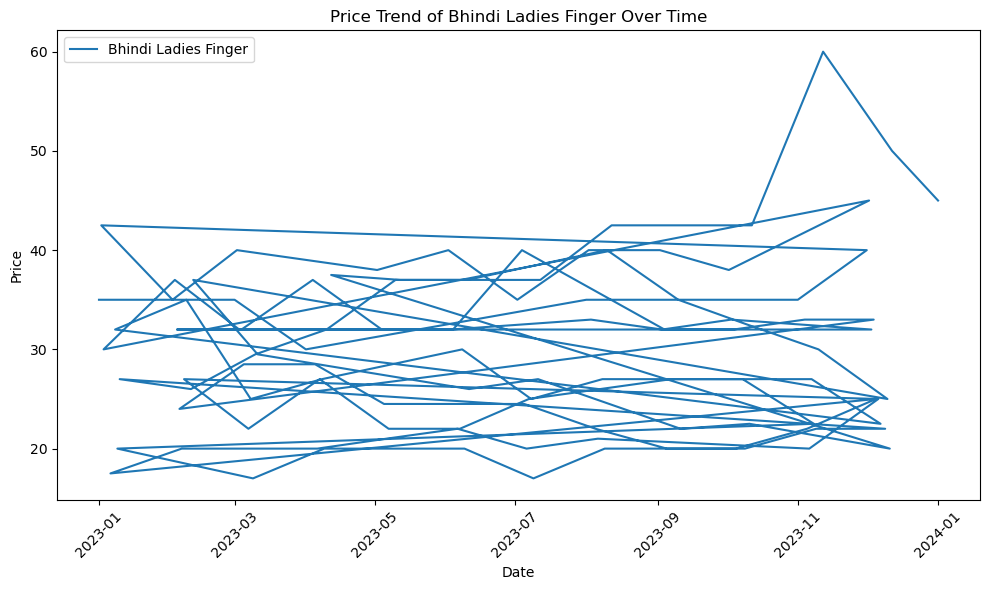

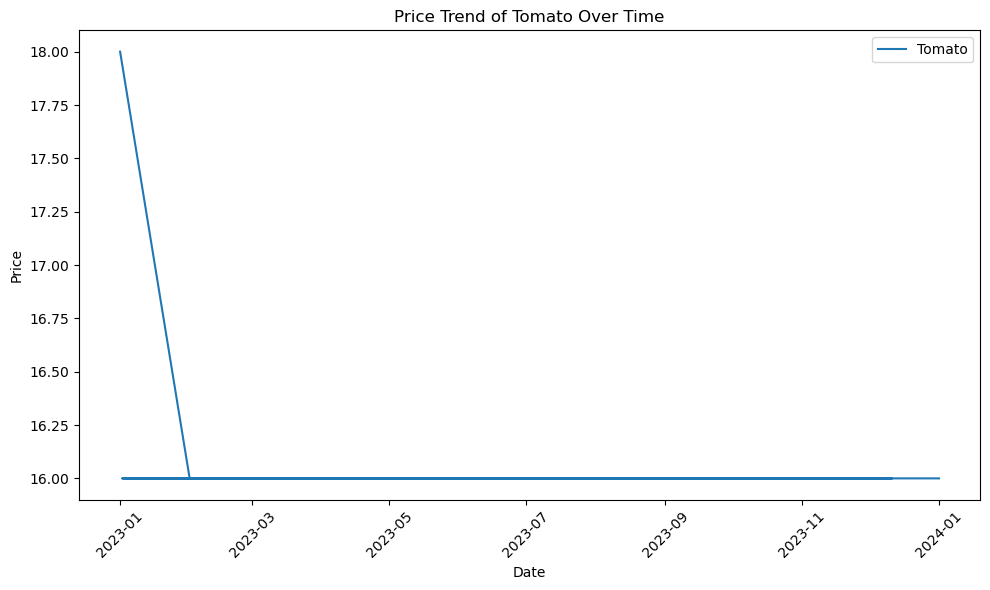

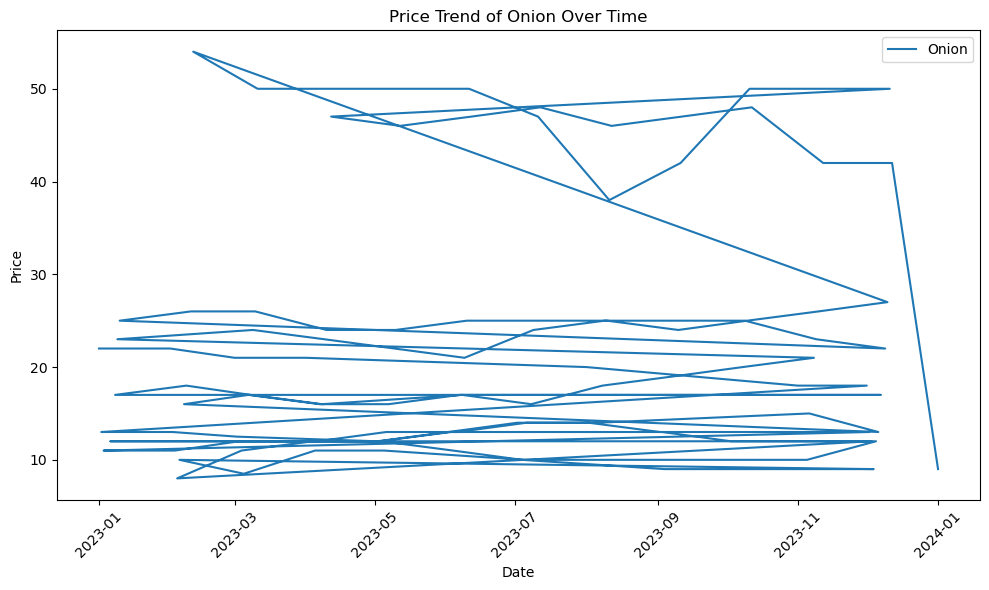

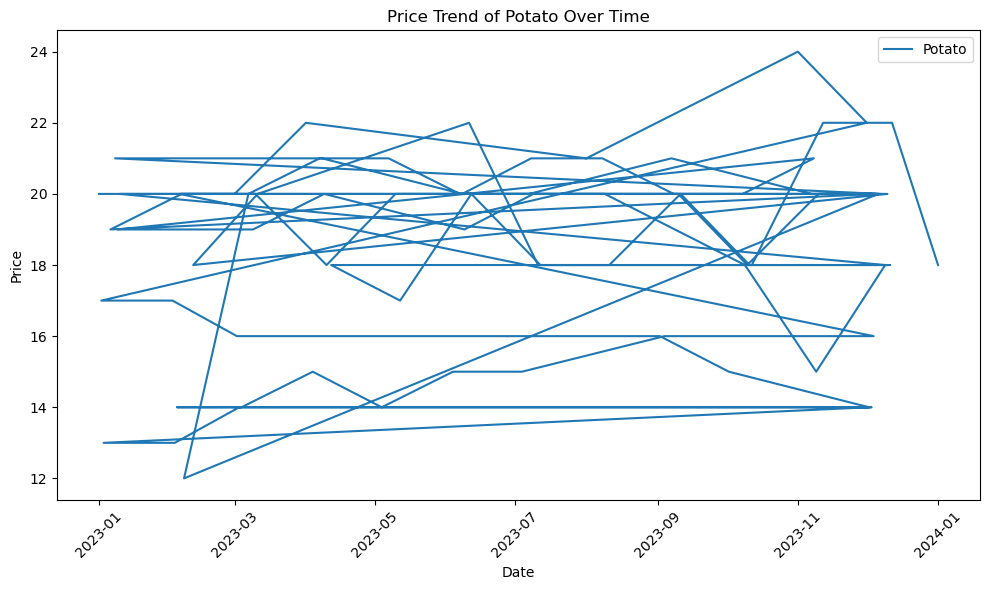

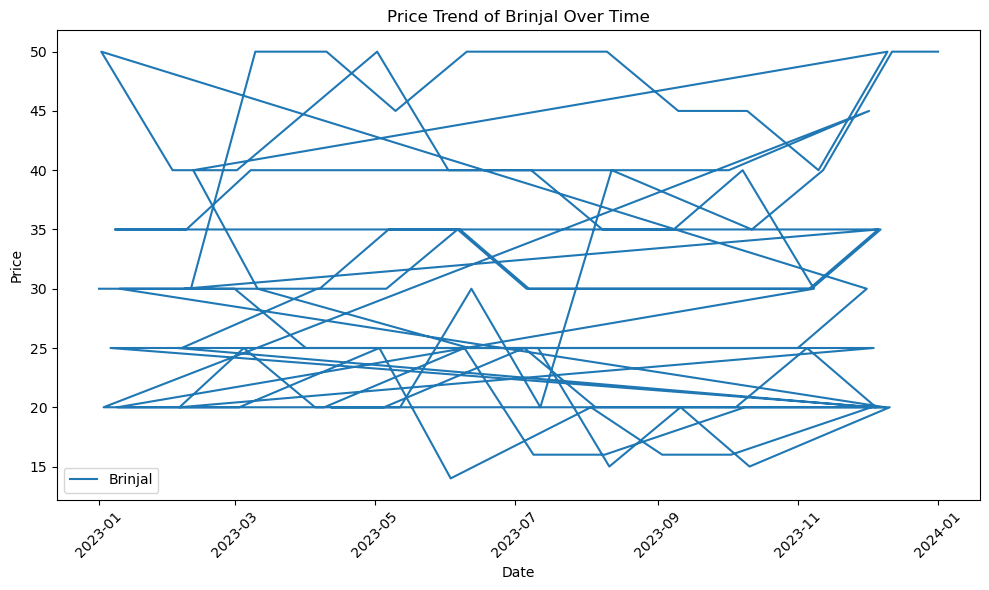

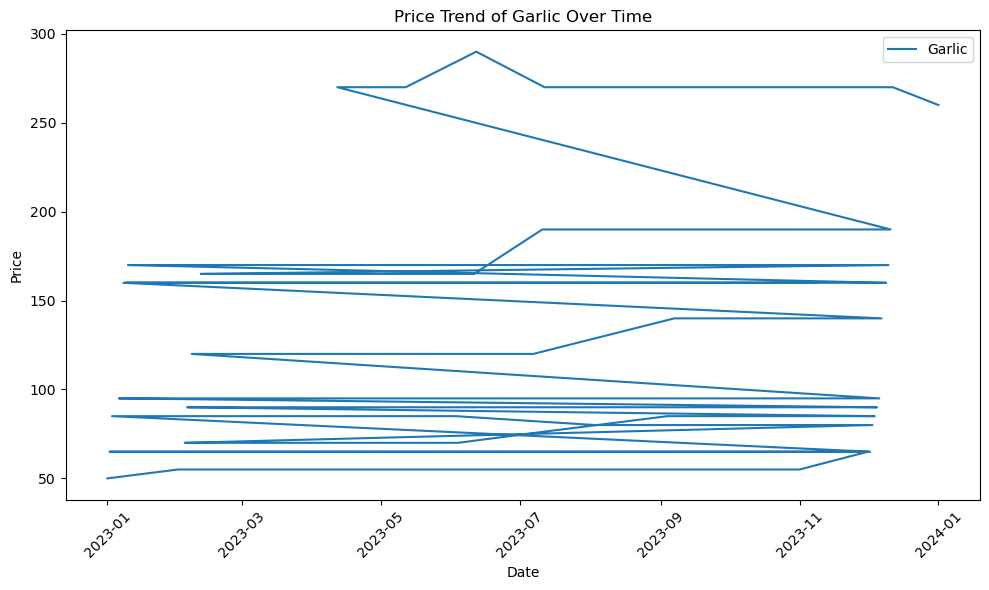

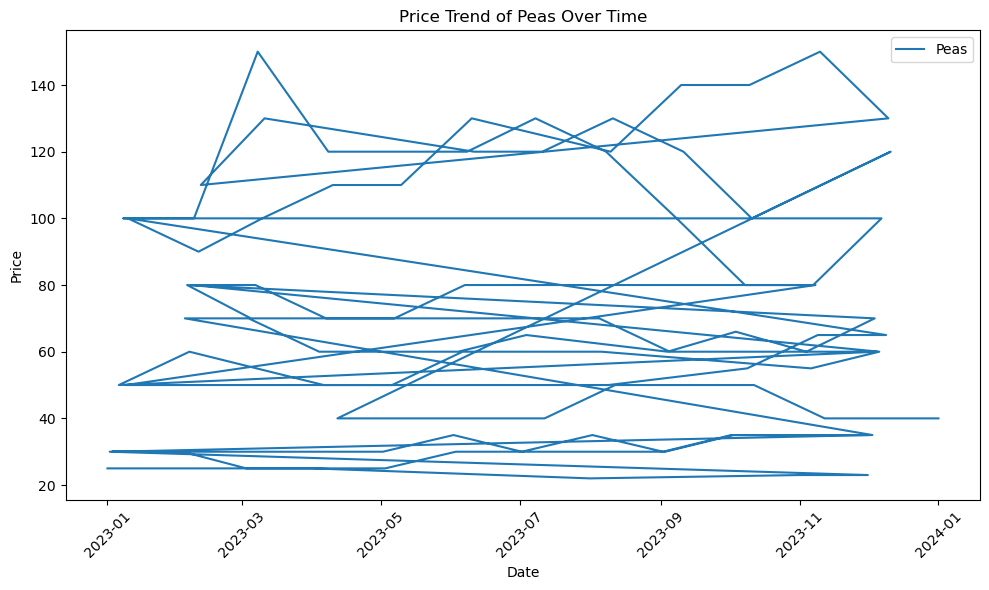

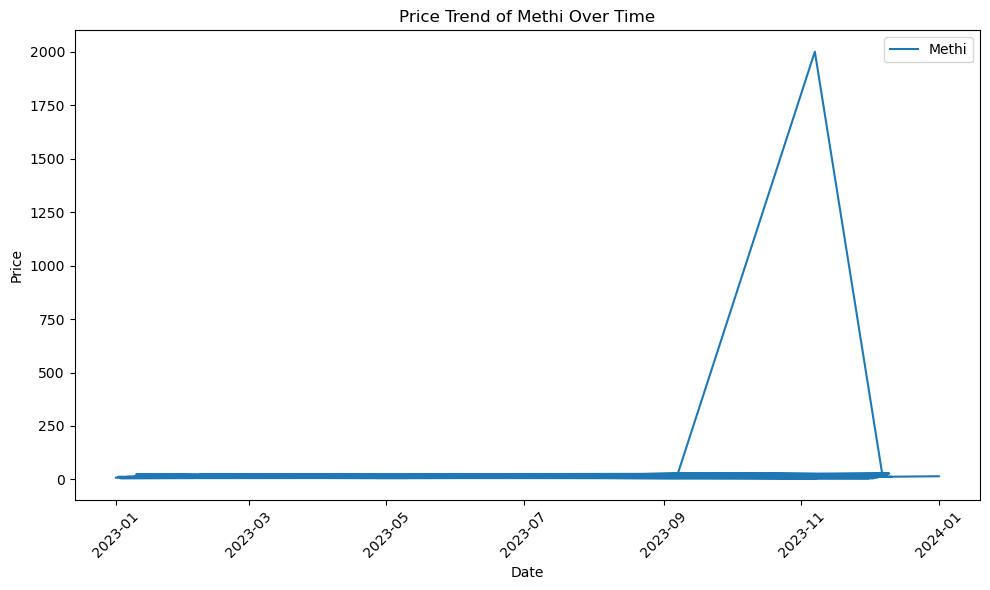

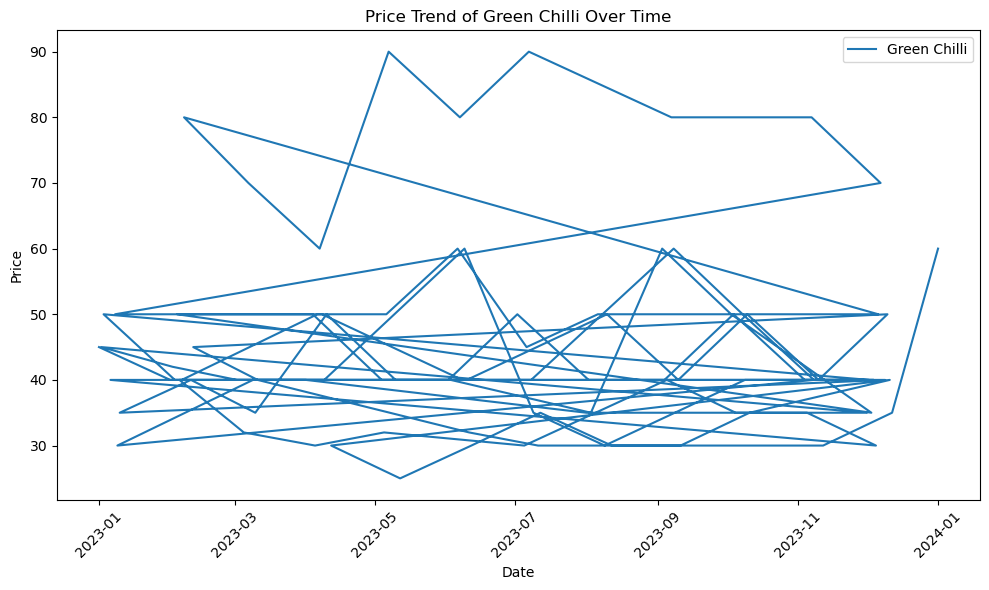

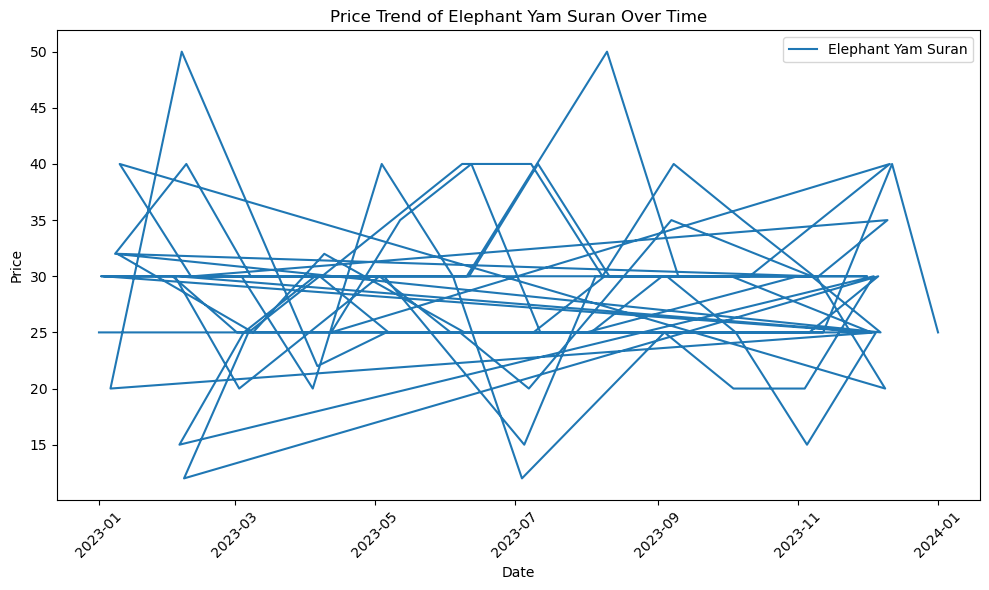

In [7]:
# Convert the price_dates column to datetime, handling errors
df['price_dates'] = pd.to_datetime(df['price_dates'], errors='coerce')

# Drop rows where price_dates is NaT (invalid dates)
df = df.dropna(subset=['price_dates'])

# List of vegetable columns
veg_columns = ['bhindi_ladies_finger', 'tomato', 'onion', 'potato', 'brinjal', 
               'garlic', 'peas', 'methi', 'green_chilli', 'elephant_yam_suran']

# Plot individual graphs for each vegetable
for veg in veg_columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df['price_dates'], df[veg], label=veg.replace('_', ' ').title())
    plt.title(f'Price Trend of {veg.replace("_", " ").title()} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

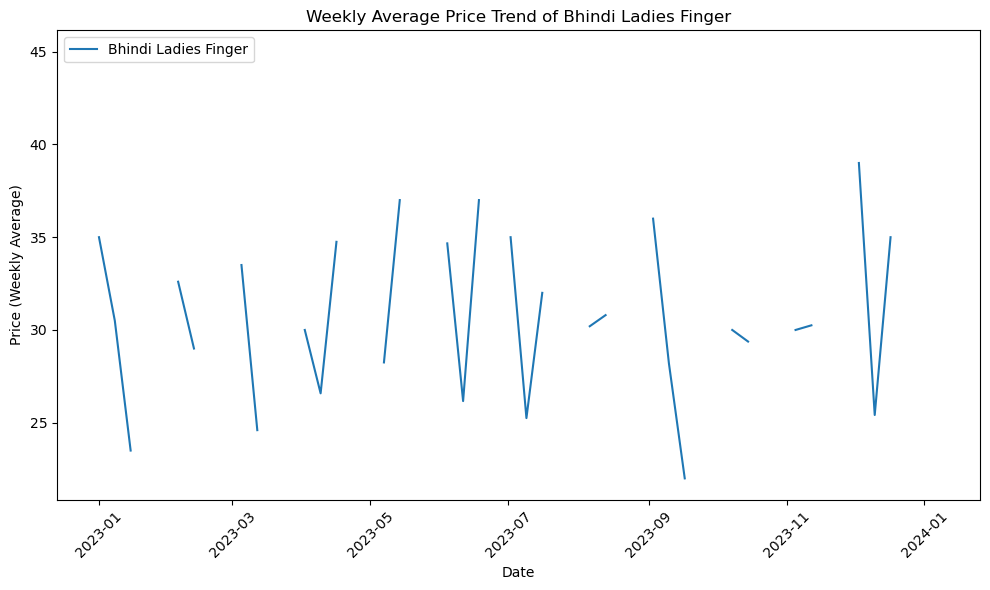

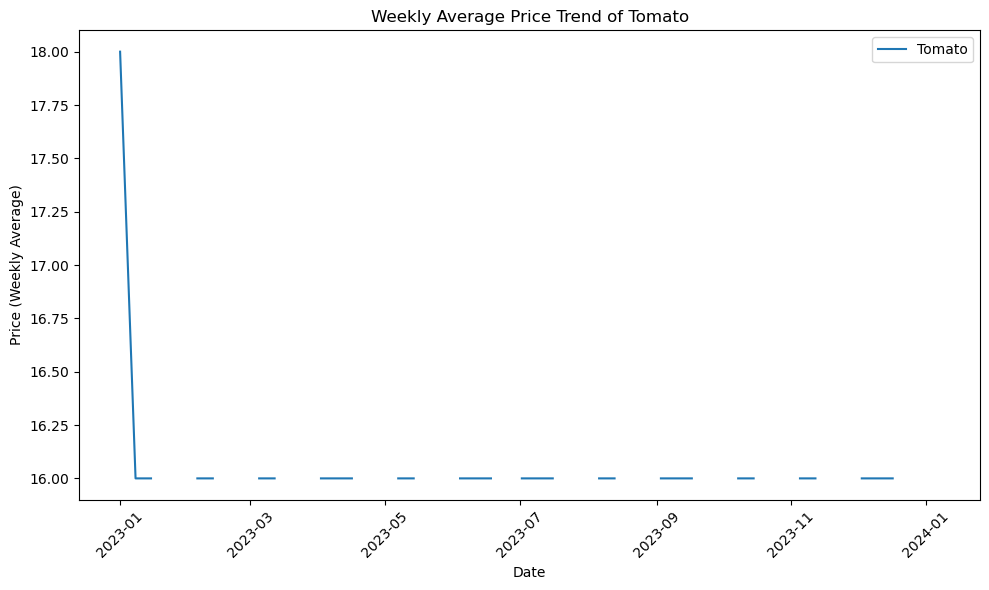

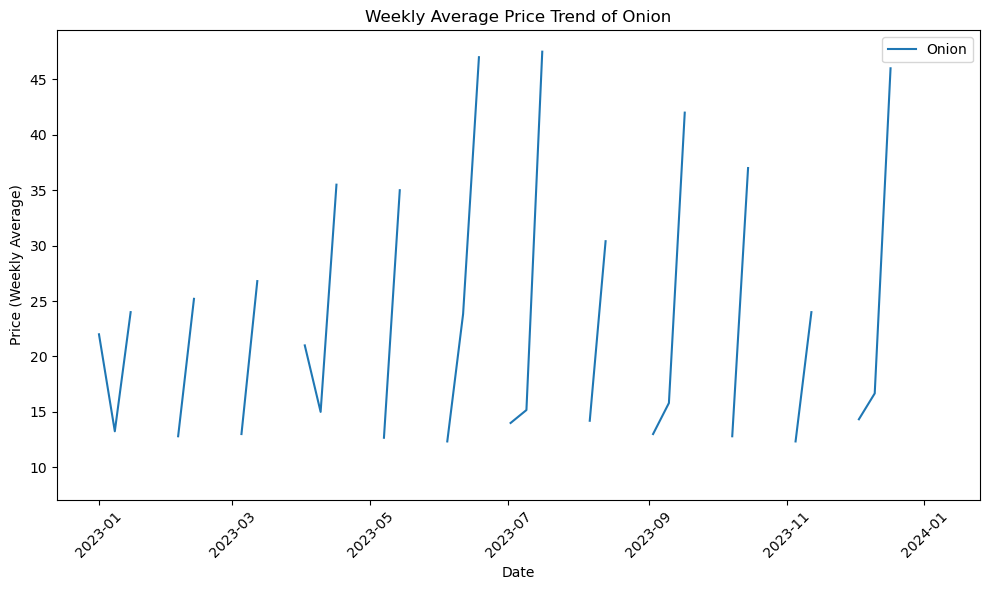

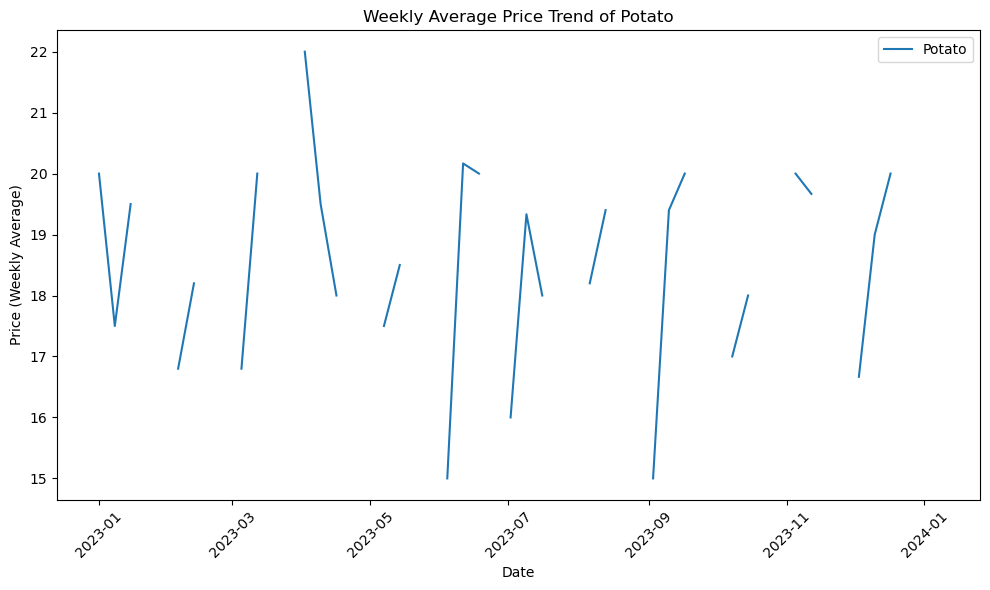

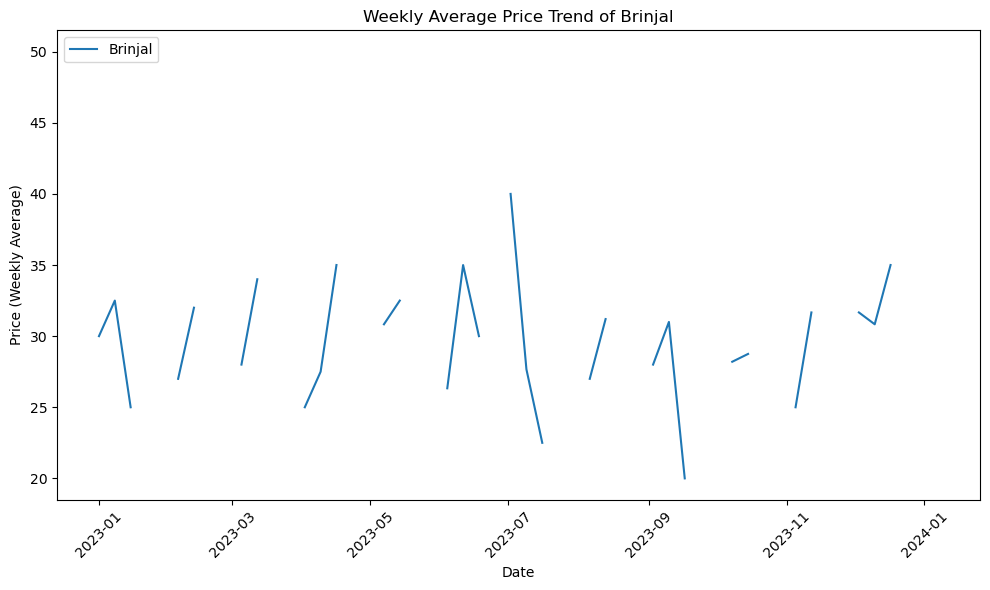

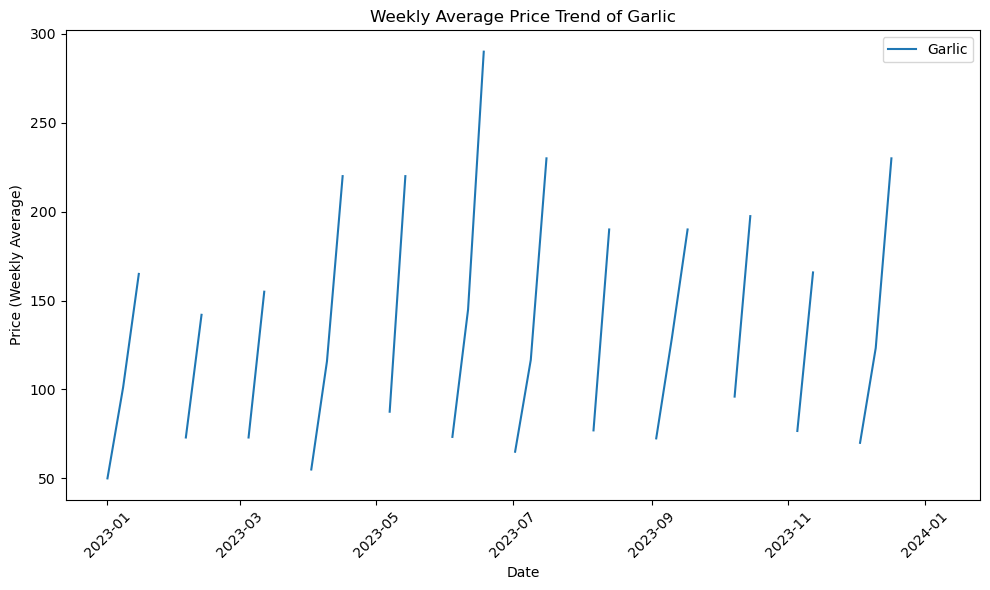

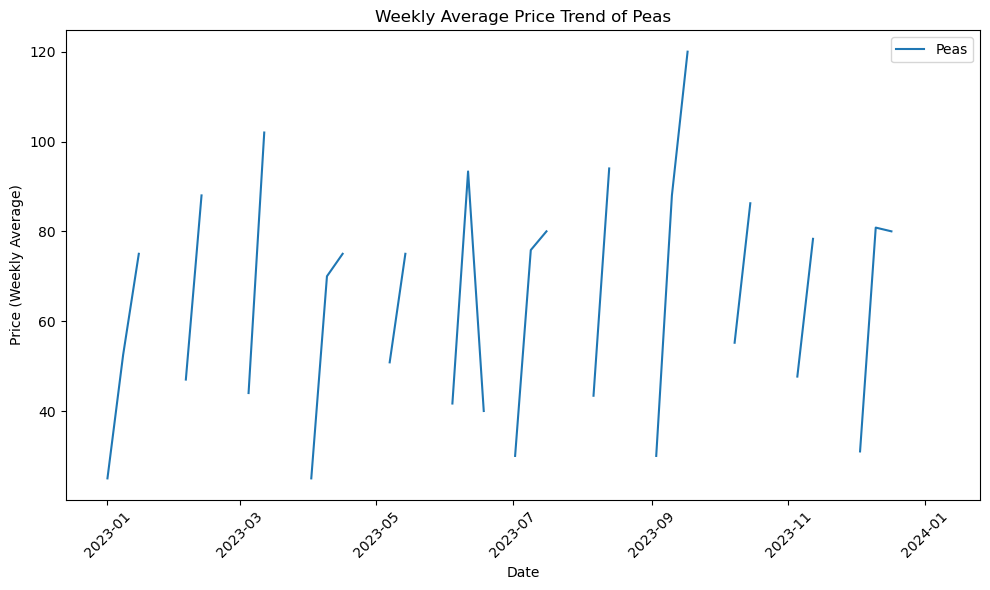

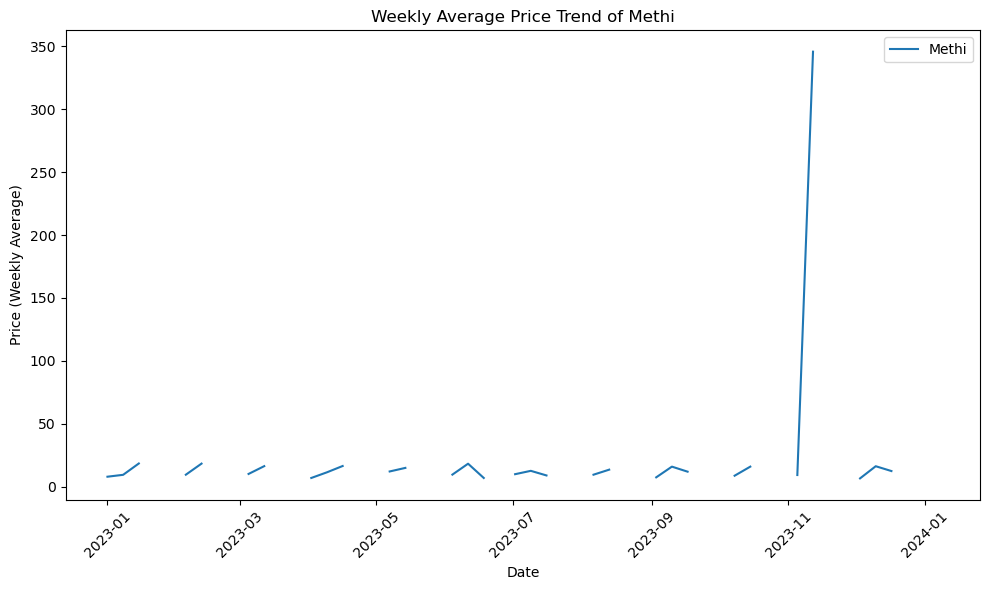

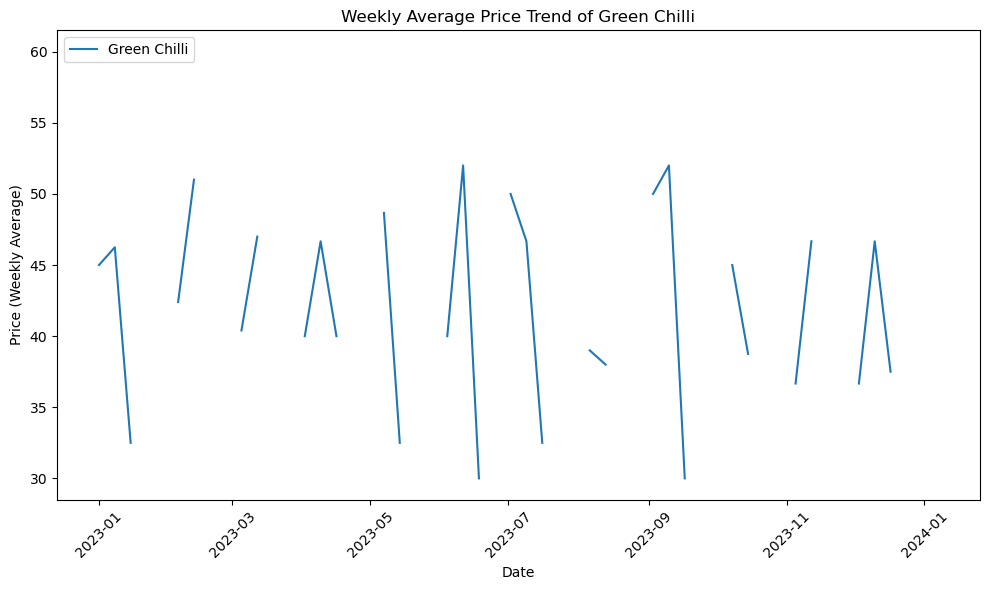

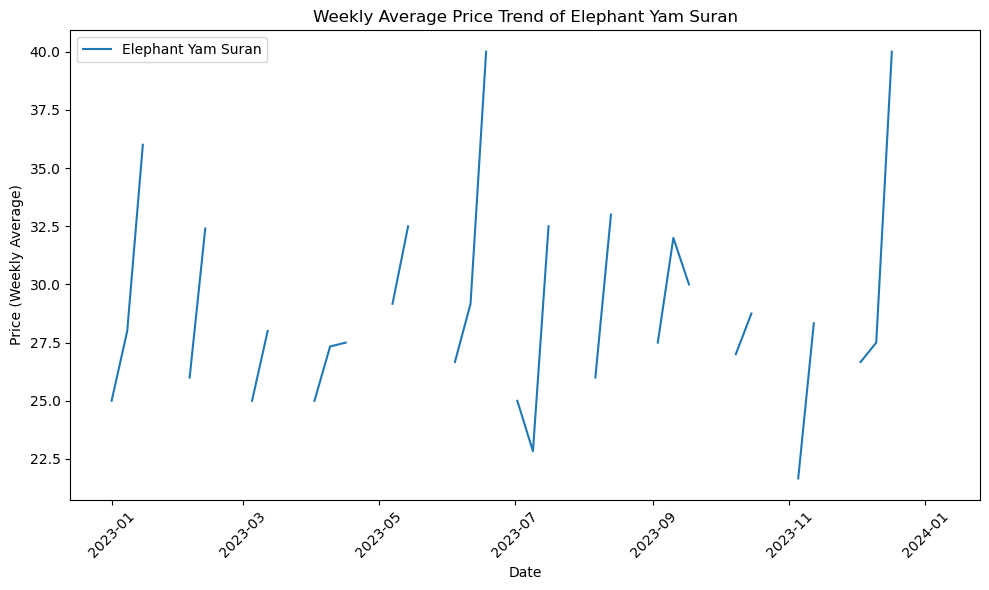

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('cleaned_vegetable_prices.csv')

# Convert the price_dates column to datetime
df['price_dates'] = pd.to_datetime(df['price_dates'], errors='coerce')

# Drop rows where price_dates is NaT
df = df.dropna(subset=['price_dates'])

# Set the price_dates column as the index to allow for resampling
df.set_index('price_dates', inplace=True)

# Resample the data by week and calculate the mean price for each vegetable
df_weekly = df.resample('W').mean()

# List of vegetable columns
veg_columns = ['bhindi_ladies_finger', 'tomato', 'onion', 'potato', 'brinjal', 
               'garlic', 'peas', 'methi', 'green_chilli', 'elephant_yam_suran']

# Plot individual graphs for each vegetable (weekly average)
for veg in veg_columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df_weekly.index, df_weekly[veg], label=veg.replace('_', ' ').title())
    plt.title(f'Weekly Average Price Trend of {veg.replace("_", " ").title()}')
    plt.xlabel('Date')
    plt.ylabel('Price (Weekly Average)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


To aggregate by month

C:\Users\gambu\AppData\Local\Temp\ipykernel_23792\1537379690.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


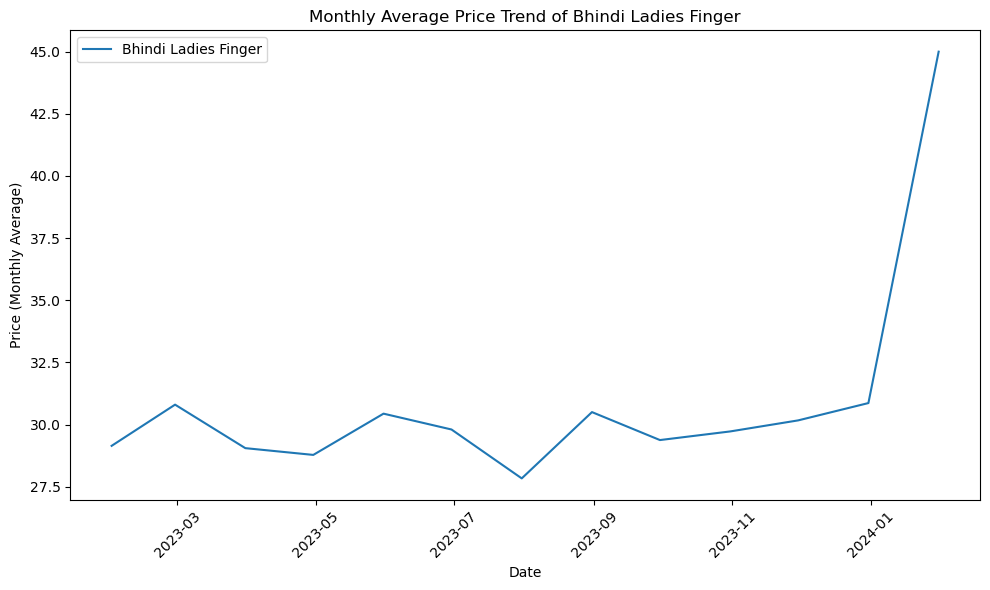

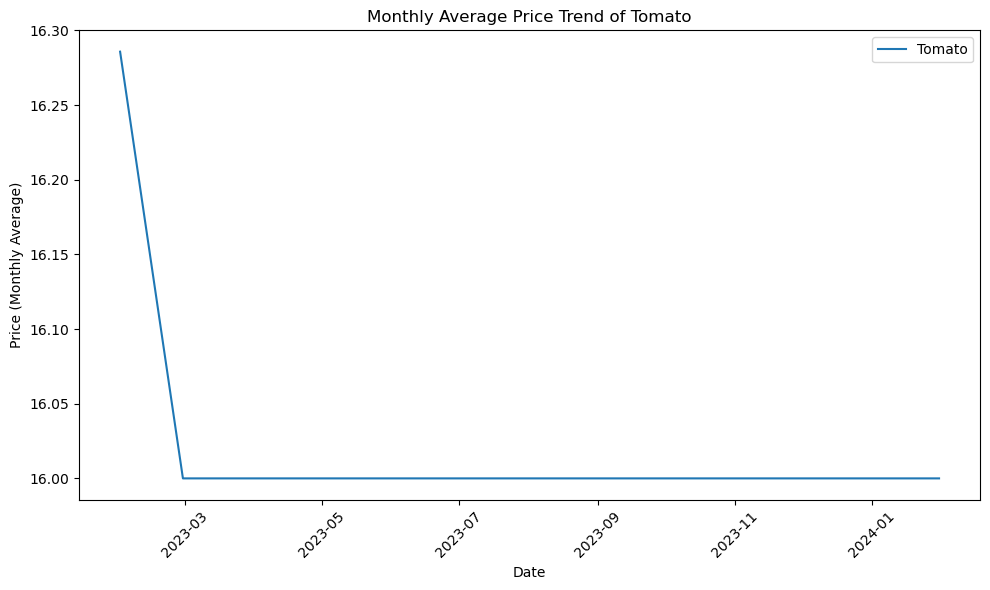

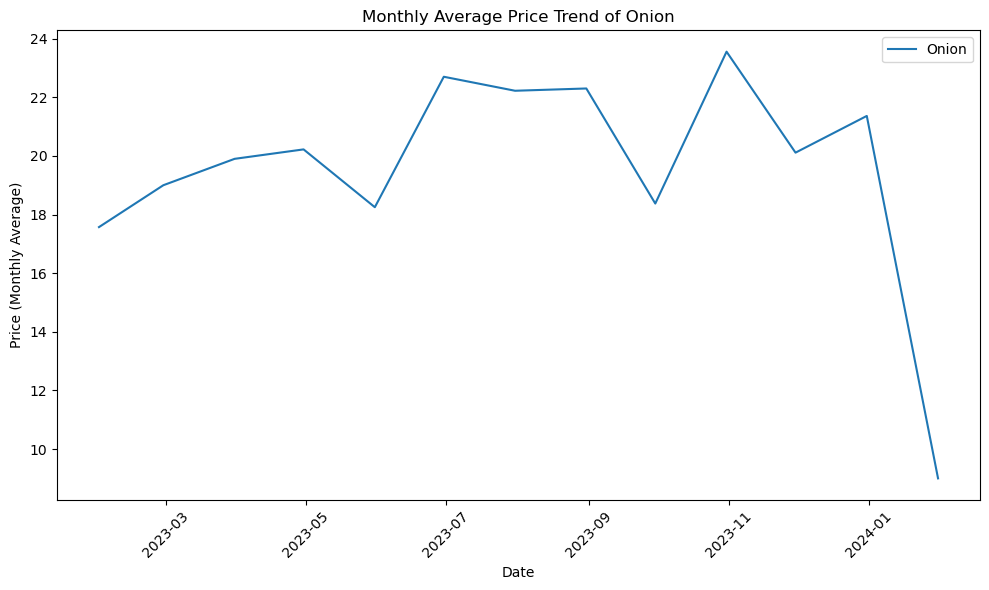

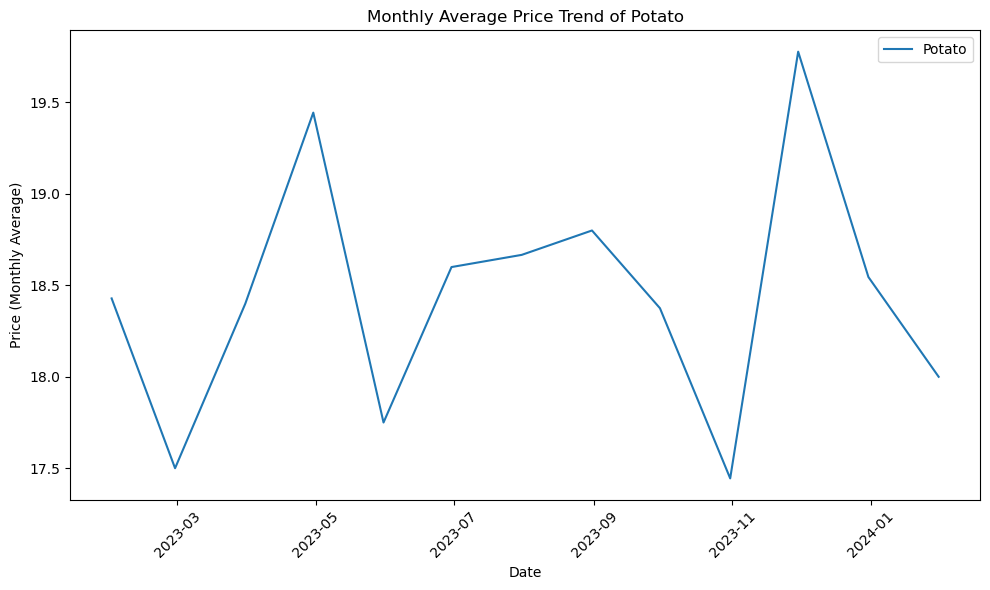

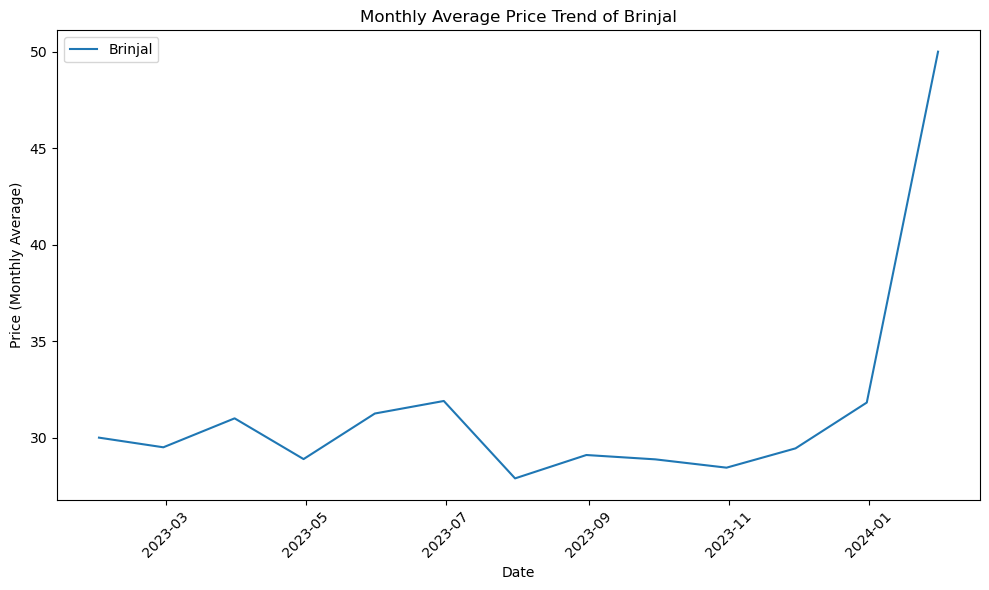

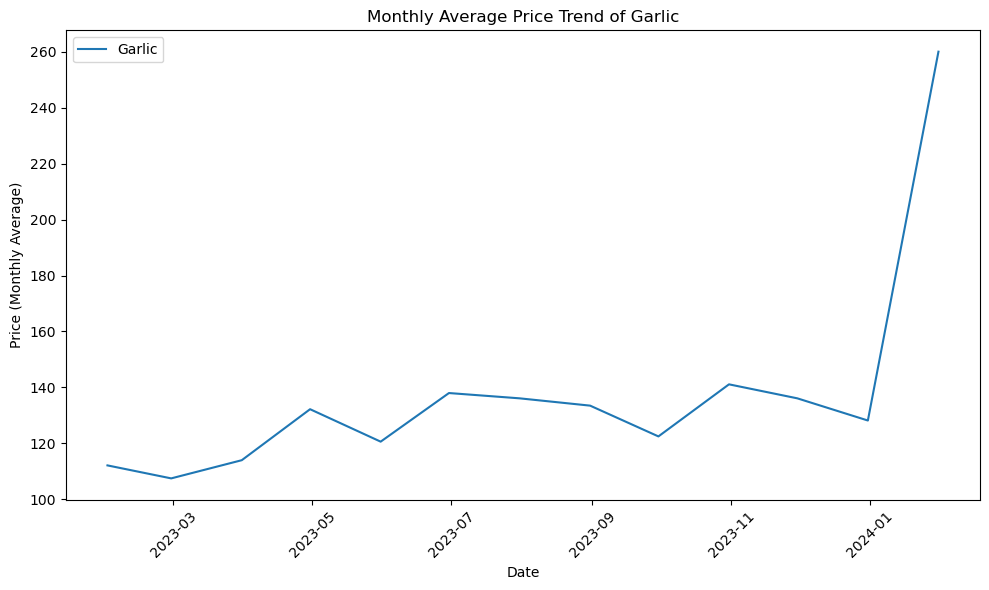

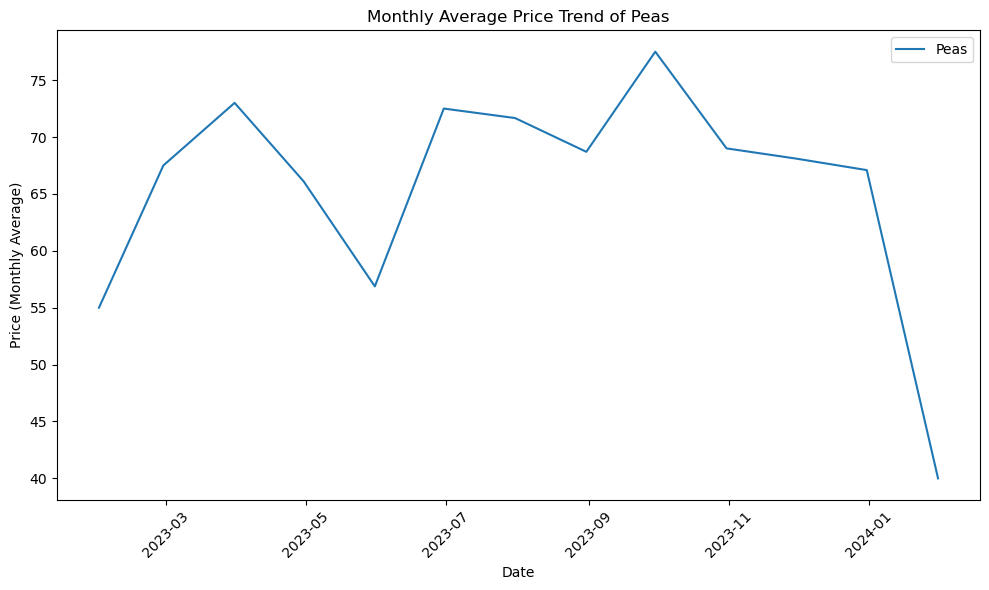

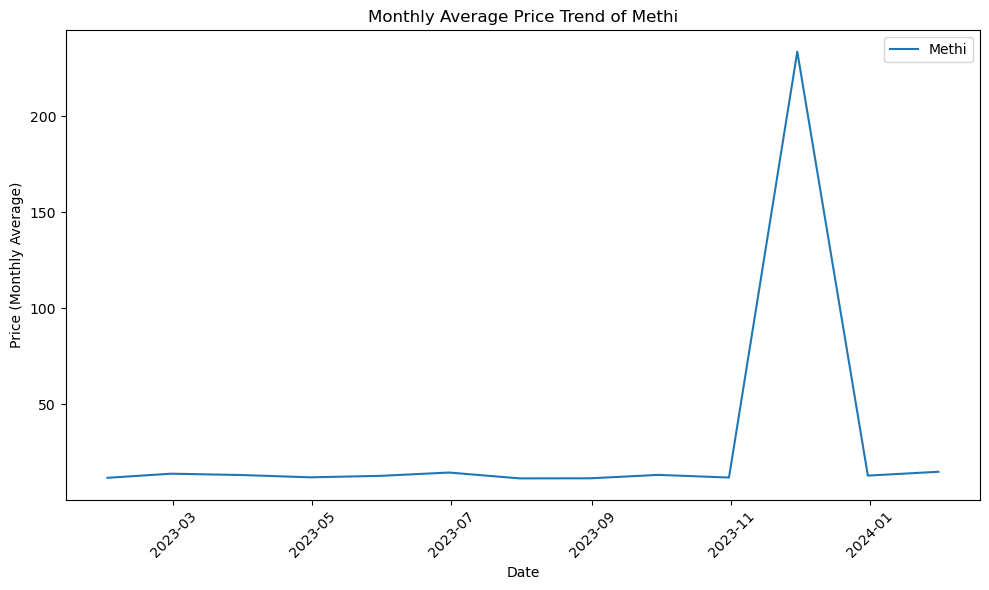

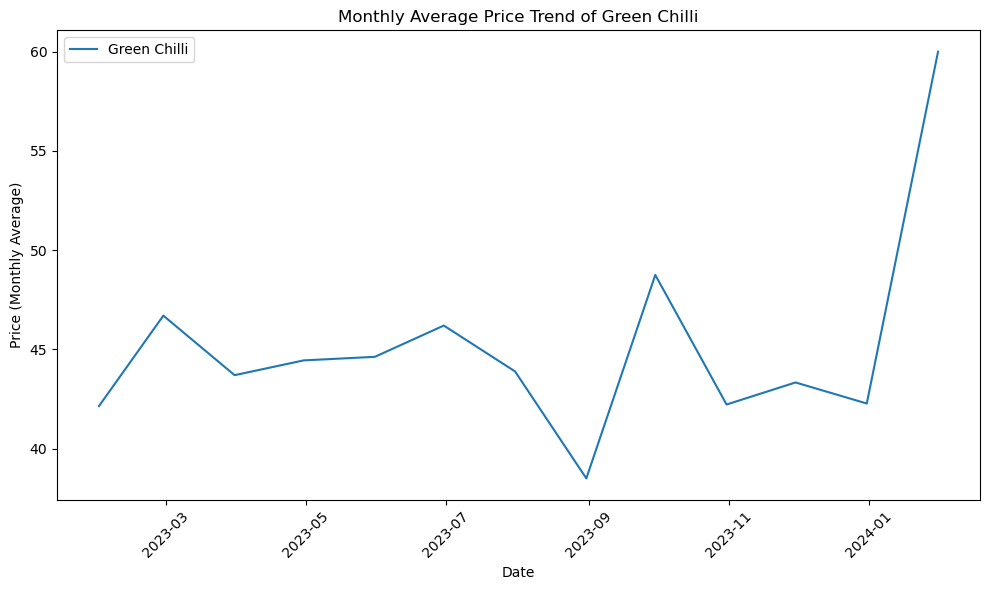

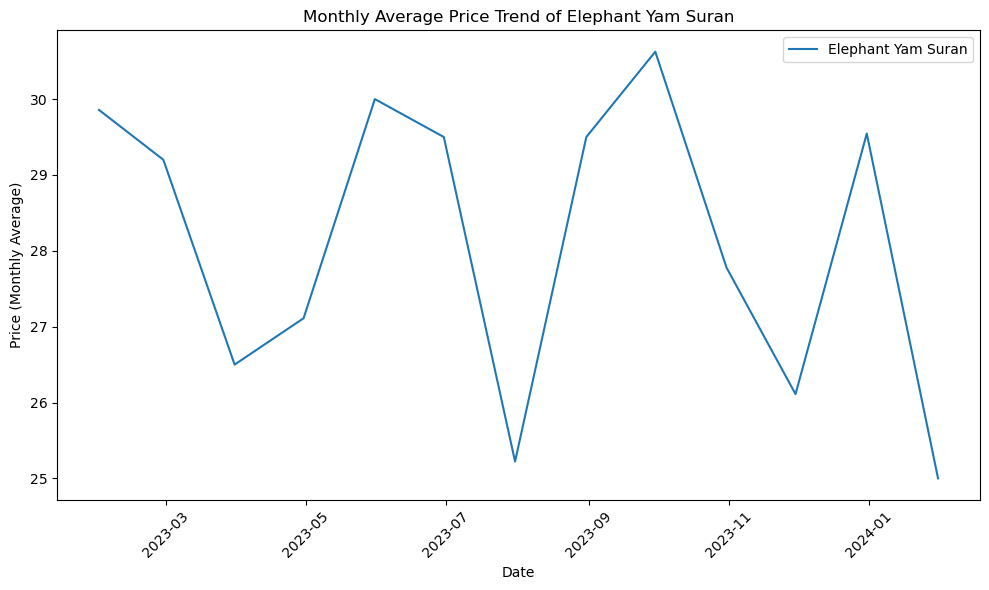

In [11]:
# Resample the data by month and calculate the mean price for each vegetable
df_monthly = df.resample('M').mean()

# Plot individual graphs for each vegetable (monthly average)
for veg in veg_columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df_monthly.index, df_monthly[veg], label=veg.replace('_', ' ').title())
    plt.title(f'Monthly Average Price Trend of {veg.replace("_", " ").title()}')
    plt.xlabel('Date')
    plt.ylabel('Price (Monthly Average)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
